EJEMPLO: Mean Shift Clustering

In [1]:
import numpy as np
import pandas as pd
from pickle import dump, load
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth


X_train = pd.read_csv('../Samples/Clean/Feature_Selection/X_train.csv')

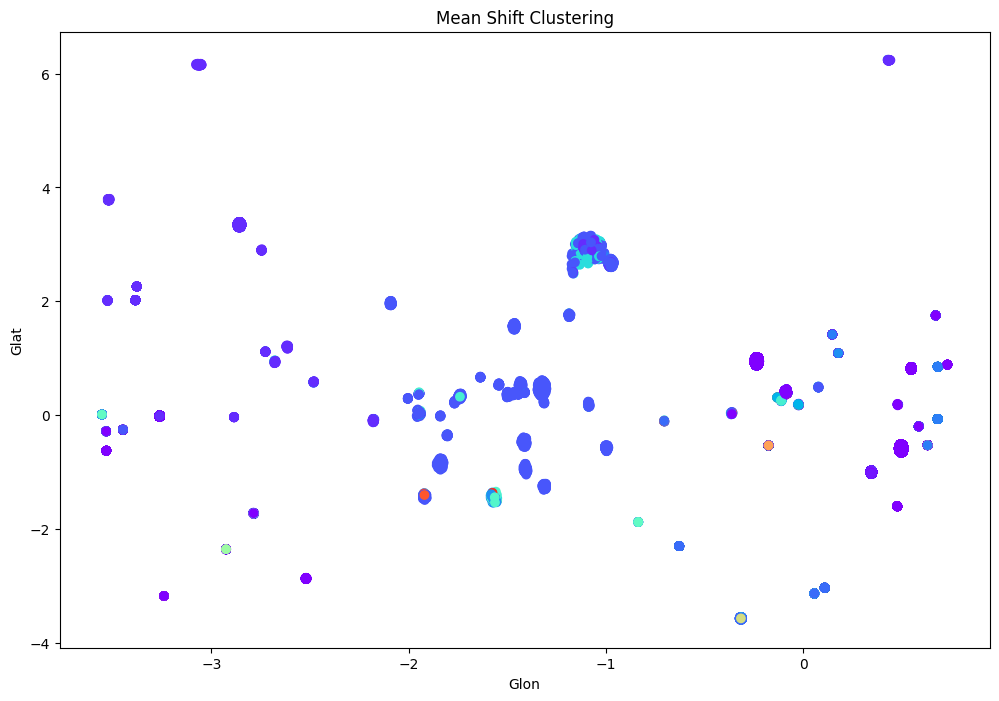

In [2]:
#Convertir el DataFrame completo a un array NumPy
X_train_array = X_train.to_numpy()

#Estimar el ancho de banda óptimo
bandwidth = estimate_bandwidth(X_train_array, quantile=0.2, n_samples=50000)

#Crear y ajustar el modelo Mean Shift
model = MeanShift(bandwidth=bandwidth, bin_seeding=True)
model.fit(X_train)

#Obtener los labels de los clústeres
labels = model.labels_

#Visualizar los resultados (seleccionando las dos características para plotear)
plt.figure(figsize=(12, 8))
plt.scatter(X_train_array[:, 0], X_train_array[:, 1], c=labels, cmap='rainbow', marker='o')
plt.title('Mean Shift Clustering')
plt.xlabel('Glon')
plt.ylabel('Glat')
plt.show()

Vamos a probar con un mayor número de n_samples a ver cuál es el resultado.

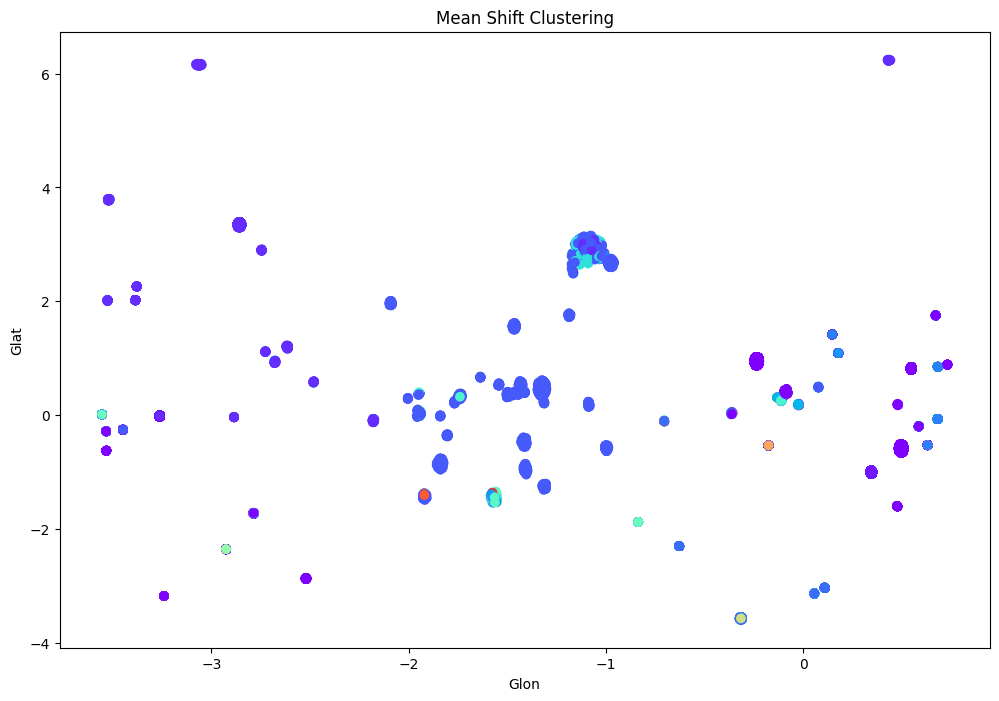

In [11]:
#Convertir el DataFrame completo a un array NumPy
X_train_array = X_train.to_numpy()

#Estimar el ancho de banda óptimo
bandwidth = estimate_bandwidth(X_train_array, quantile=0.2, n_samples=350000)

#Crear y ajustar el modelo Mean Shift
model = MeanShift(bandwidth=bandwidth, bin_seeding=True)
model.fit(X_train)

#Obtener los labels de los clústeres
labels = model.labels_

#Visualizar los resultados (seleccionando las dos características para plotear)
plt.figure(figsize=(12, 8))
plt.scatter(X_train_array[:, 0], X_train_array[:, 1], c=labels, cmap='rainbow', marker='o')
plt.title('Mean Shift Clustering')
plt.xlabel('Glon')
plt.ylabel('Glat')
plt.show()

In [12]:
dump(model, open("../Models/meanshift.pkl", "wb"))

A primera vista, los resultados parecen los mismos que la primera vez que corrimos el modelo con un n_samples menor.

A continuación:

- Se crean dos modelos de Mean Shift, uno sin especificar el bandwidth y otro con un bandwidth específico. Los resultados se visualizan en un gráfico comparativo para mostrar la diferencia en el clustering. Debería darnos una idea clara de cómo el bandwidth afecta el resultado del clustering con Mean Shift.

In [3]:

# Convertir el DataFrame completo en un array NumPy
X_train_array = X_train.to_numpy()

# Crear y ajustar el modelo de Mean Shift sin especificar el bandwidth
model_auto = MeanShift()
model_auto.fit(X_train_array)
labels_auto = model_auto.labels_
cluster_centers_auto = model_auto.cluster_centers_

# Especificar el bandwidth
bandwidth = 1.0  # Ajusta según tus datos
model_specified = MeanShift(bandwidth=bandwidth)
model_specified.fit(X_train_array)
labels_specified = model_specified.labels_
cluster_centers_specified = model_specified.cluster_centers_

# Visualizar los resultados
plt.figure(figsize=(12, 8))

# Resultados sin especificar el bandwidth
plt.subplot(1, 2, 1)
plt.scatter(X_train_array[:, 0], X_train_array[:, 1], c=labels_auto, cmap='rainbow', marker='o')
plt.scatter(cluster_centers_auto[:, 0], cluster_centers_auto[:, 1], marker='x', color='black', s=200, linewidths=3)
plt.title('Mean Shift Clustering (auto bandwidth)', fontsize=16)
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)

# Resultados especificando el bandwidth
plt.subplot(1, 2, 2)
plt.scatter(X_train_array[:, 0], X_train_array[:, 1], c=labels_specified, cmap='rainbow', marker='o')
plt.scatter(cluster_centers_specified[:, 0], cluster_centers_specified[:, 1], marker='x', color='black', s=200, linewidths=3)
plt.title(f'Mean Shift Clustering (bandwidth={bandwidth})', fontsize=16)
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)

plt.tight_layout()
plt.show()


KeyboardInterrupt: 

Interrumpido tras más de 10h.

In [13]:
#Convertir el DataFrame completo en un array NumPy
X_train_array = X_train.to_numpy()

#Crear y ajustar el modelo de Mean Shift
model = MeanShift()
model.fit(X_train_array)

#Obtener los labels de los clústeres
labels = model.labels_

#Obtener los centros de los clústeres
cluster_centers = model.cluster_centers_

#Visualizar los resultados (seleccionando dos características para plotear)
plt.scatter(X_train_array[:, 0], X_train_array[:, 1], c=labels, cmap='rainbow', marker='o')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', color='black')
plt.title('Mean Shift Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

El kernel se ha parado debido a problemas de memoria al intentar ejecutar el algoritmo Mean Shift en un conjunto de datos grande, ya que este modelo hace un uso intensivo de memoria. Puesto que preferimos no renunciar a usar todo el conjunto de datos para entrenar el modelo si con otro modelo de clustering tenemos la posibilidad de usar todos los datos y obtener buenos resultados, vamos a seguir buscando modelos.